Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Farnoush"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\msfar\OneDrive\Desktop\Python 2- UOT\Module1\cereal.csv")

In [5]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [7]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#### Question1:

In [8]:
# First I decided to split the name and seperate bran or the type from other words.

df1 = df['name'].str.rsplit(n=1, expand=True)

In [9]:
df1

,0,1
0,100%,Bran
1,100% Natural,Bran
2,All-Bran,None
3,All-Bran with Extra,Fiber
4,Almond,Delight
...,...,...
72,Triples,None
73,Trix,None
74,Wheat,Chex
75,Wheaties,None


In [10]:
# I relazied I can't use the previous split, so I decided to describe a function to read the names and if finds the word, catogrizes it. 
# About the the multi type cereals, I decided to close my eye on it as they weren't that much and I decided to go with the dominant type.

In [11]:
def Type(i):
    type=[]
    Cereal={'Bran', 'Wheat', 'Fiber','Protein', 'Crunch', 'Corn', 'Nut', 'Rice', 'Other'}
    if  'Bran' in i:
        type='Bran'
    elif 'Wheat' in i:
         type='Wheat'
    elif 'Fiber' in i:
         type='Fiber'
    elif 'Protein' in i:
         type='Protein'
    elif 'Crunch' in i:
         type='Crunch'
    elif 'Corn' in i:
         type='Corn'
    elif 'Nut' in i:
         type='Nut'
    elif 'Rice' in i:
         type='Rice'     
    else:
         type='Other'
    return type   

In [12]:
#Applying the function to the dataframe

df['Creal Type'] = df['name'].apply(Type)

In [13]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


In [14]:
# Renaming the columns.

df.rename(columns={'Creals Type': 'Type of Cereal'}, inplace=True)

In [15]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


#### Question 2

In [16]:
# I dentifying if we have any negative values.
(df['potass']<0).any()

True

In [17]:
# Seperating only the int/floats and leaving out the objects.
num = df._get_numeric_data()

In [18]:
# Turn the negatives into nan, this was the only thing came to my mind that worked!
num[num < 0] =np.nan

In [19]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


In [20]:
# Filling the nans( negatives) with the median

df[['calories', 'protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']] = df[['calories', 'protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']].fillna(df[['calories', 'protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']].median())

In [21]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


#### Question 3

In [22]:
# Checking if the Weight isn't already standerdlize.
df['weight'].min()

0.5

In [23]:
df['weight'].max()

1.5

In [24]:
df.loc[df['weight'] == 1.5]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.5,0.67,30.313351,Other
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785,Bran


In [25]:
# Deviding all the columns by the weight column, even the weight column itself, to make it 1.
df[['calories', 'protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','weight']] = df[['calories', 'protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','weight']].div(df['weight'], axis=0)

Testing:

In [26]:
df.loc[df['name'] == 'Mueslix Crispy Blend']

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
46,Mueslix Crispy Blend,K,C,106.666667,2.0,1.333333,100.0,2.0,11.333333,8.666667,106.666667,16.666667,3,1.0,0.67,30.313351,Other


In [27]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3,1.0,0.75,34.384843,Other


#### Questing 4 :

I chose to define a cereal healthy if its sugar<9 and its fiber>3 and its protein>2

In [28]:
def Health(	sugars, fiber, protein ):
    if 	 sugars <9 and fiber>3 and protein > 2 :
        return 'Healthy'
    else: 
        return 'Unhealthy'

In [29]:
# Applying the above functions to the dataframe.
df['Health Category'] = df.apply(lambda x: Health(x['sugars'],x['fiber'],x['protein']), axis =1)

In [30]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type,Health Category
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,Healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,Unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,Healthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,Healthy
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3,1.0,0.75,34.384843,Other,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3,1.0,0.75,39.106174,Other,Unhealthy
73,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2,1.0,1.00,27.753301,Other,Unhealthy
74,Wheat Chex,R,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1,1.0,0.67,49.787445,Wheat,Unhealthy
75,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1,1.0,1.00,51.592193,Wheat,Unhealthy


In [31]:
# Just checking if I  really have any healthy cereal.

df.loc[df['Health Category']=='Healthy'] 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type,Health Category
0,100% Bran,N,C,70.000000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3,1.0,0.33,68.402973,Bran,Healthy
2,All-Bran,K,C,70.000000,4.000000,1.0,260.0,9.000000,7.000000,5.0,320.000000,25.0,3,1.0,0.33,59.425505,Bran,Healthy
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3,1.0,0.50,93.704912,Bran,Healthy
9,Bran Flakes,P,C,90.000000,3.000000,0.0,210.0,5.000000,13.000000,5.0,190.000000,25.0,3,1.0,0.67,53.313813,Bran,Healthy
19,Cracklin' Oat Bran,K,C,110.000000,3.000000,3.0,140.0,4.000000,10.000000,7.0,160.000000,25.0,3,1.0,0.50,40.448772,Bran,Healthy
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,96.000000,2.400000,1.6,128.0,4.000000,9.600000,8.0,160.000000,20.0,3,1.0,0.67,40.917047,Other,Healthy
63,Shredded Wheat,N,C,96.385542,2.409639,0.0,0.0,3.614458,19.277108,0.0,114.457831,0.0,1,1.0,1.00,68.235885,Wheat,Healthy
64,Shredded Wheat 'n'Bran,N,C,90.000000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1,1.0,0.67,74.472949,Bran,Healthy


In [32]:
# Checking the ansewr above with the condition I had in my mind.
df[(df['sugars'] < 9)  & (df['fiber'] > 3)  & (df['protein'] >2) ]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type,Health Category
0,100% Bran,N,C,70.000000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3,1.0,0.33,68.402973,Bran,Healthy
2,All-Bran,K,C,70.000000,4.000000,1.0,260.0,9.000000,7.000000,5.0,320.000000,25.0,3,1.0,0.33,59.425505,Bran,Healthy
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3,1.0,0.50,93.704912,Bran,Healthy
9,Bran Flakes,P,C,90.000000,3.000000,0.0,210.0,5.000000,13.000000,5.0,190.000000,25.0,3,1.0,0.67,53.313813,Bran,Healthy
19,Cracklin' Oat Bran,K,C,110.000000,3.000000,3.0,140.0,4.000000,10.000000,7.0,160.000000,25.0,3,1.0,0.50,40.448772,Bran,Healthy
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,96.000000,2.400000,1.6,128.0,4.000000,9.600000,8.0,160.000000,20.0,3,1.0,0.67,40.917047,Other,Healthy
63,Shredded Wheat,N,C,96.385542,2.409639,0.0,0.0,3.614458,19.277108,0.0,114.457831,0.0,1,1.0,1.00,68.235885,Wheat,Healthy
64,Shredded Wheat 'n'Bran,N,C,90.000000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1,1.0,0.67,74.472949,Bran,Healthy


#### Question 5:

In [33]:
# Categorzing manufactureres cereals based on being healthy, but it just gave me the whole count.
df.groupby('mfr').agg({'Health Category':'count'})

,Health Category
mfr,
A,1
G,22
K,23
N,6
P,9
Q,8
R,8


In [34]:
# I needed to add the "_" for my next command

df = df.rename(columns={'Health Category': 'Health_Category'})

In [35]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Creal Type,Health_Category
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,Healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,Unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,Healthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,Healthy
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3,1.0,0.75,34.384843,Other,Unhealthy


In [36]:
# Here I could realy Categorize manufactureres cereals based on being healthy and not healthy.

df1=df.groupby('mfr').Health_Category.value_counts().unstack().fillna(0)

In [37]:
df1

Health_Category,Healthy,Unhealthy
mfr,,
A,0.0,1.0
G,0.0,22.0
K,3.0,20.0
N,3.0,3.0
P,2.0,7.0
Q,0.0,8.0
R,0.0,8.0


In [38]:
df1['Sum'] = df1['Healthy'] + df1['Unhealthy']

In [39]:
df1

Health_Category,Healthy,Unhealthy,Sum
mfr,,,
A,0.0,1.0,1.0
G,0.0,22.0,22.0
K,3.0,20.0,23.0
N,3.0,3.0,6.0
P,2.0,7.0,9.0
Q,0.0,8.0,8.0
R,0.0,8.0,8.0


In [40]:
# Hear I devide the number of healthy ones by the whole amount each manufacture produces and then multply it by 100 to make it percentage!

df1['Percent'] = df1['Healthy'].div(df1['Sum'], axis=0)*100

In [41]:
df1

Health_Category,Healthy,Unhealthy,Sum,Percent
mfr,,,,
A,0.0,1.0,1.0,0.000000
G,0.0,22.0,22.0,0.000000
K,3.0,20.0,23.0,13.043478
N,3.0,3.0,6.0,50.000000
P,2.0,7.0,9.0,22.222222
Q,0.0,8.0,8.0,0.000000
R,0.0,8.0,8.0,0.000000


#### Question 6: 

In [42]:
# Grouping by the health category and inside that, calculate the mean, min and max of the rating for each category.

df2 = (df.groupby(['Health_Category'])['rating']
        .agg(['mean','min','max'])
        )

In [43]:
df2

,mean,min,max
Health_Category,,,
Healthy,62.365232,40.448772,93.704912
Unhealthy,40.381702,18.042851,72.801787


#### Question 7:

In [44]:
# Grouping by the ceral type and inside that, calculate the mean, min and max of the rating for each category.

df3 = (df.groupby(['Creal Type'])['rating']
        .agg(['mean','min','max'])
        )

In [45]:
df3

,mean,min,max
Creal Type,,,
Bran,50.714179,28.592785,93.704912
Corn,40.482720,35.782791,45.863324
Crunch,26.078598,18.042851,36.523683
Nut,42.736791,31.072217,53.371007
Other,37.379947,21.871292,55.333142
Rice,47.771735,40.560159,60.756112
Wheat,56.333863,36.176196,72.801787


#### Question 8:

<Axes: xlabel='mfr'>

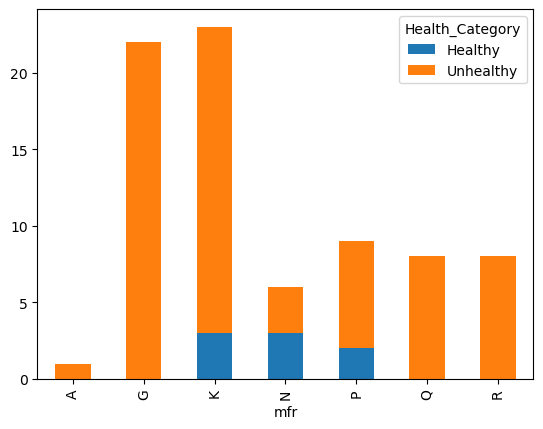

In [46]:
# Here first I grouped by the manufacturer and the health category, then I unsatcked them based on the health category in the bar charts.

gdf = df.groupby(['mfr', 'Health_Category']).size()

gdf = gdf.unstack('Health_Category')

col_to_plot = gdf.columns.tolist()

gdf[col_to_plot].plot(kind='bar', stacked=True)

#### Question 9:

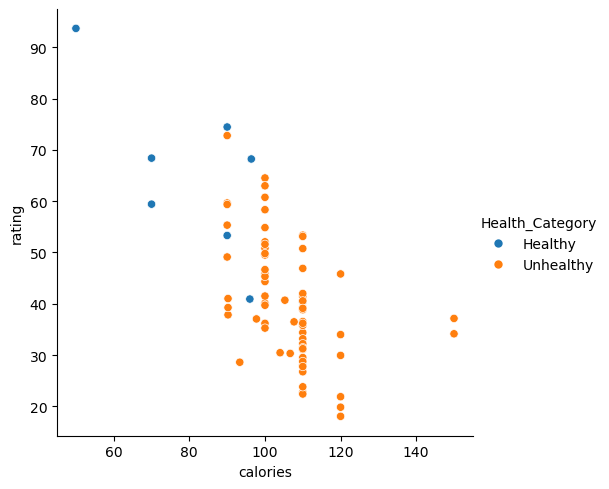

In [47]:
# I just used seaborn because I could use the hue as the color, for the health category as the question wanted me to.

sns.relplot(data=df, x='calories', y='rating', hue='Health_Category')
plt.show()

#### Question 10:

In [48]:
# I again grouped the data by shelf but categorized inside of that with the health category and looked by eye.

df4=df.groupby('shelf').Health_Category.value_counts().unstack().fillna(0)
df4
#shelf 3 has the most healthy sereals based on the below table.

Health_Category,Healthy,Unhealthy
shelf,,
1,2.0,18.0
2,0.0,21.0
3,6.0,30.0


#### Question 11:

My analysis from the data set is that the most of cereals can be considered unhealthy and few manufactureres focus on producing healthy cereal.
Also, the healthy ones are typically rated higher and have less calories, but other than that there is not that much relationship between the calory and rating.

The most of the columns seem have a normal distribution and generally the data set was clean, without any nans or outliers.